Titanic Ship Case Study

By Priyaranjan Mishra

In [2]:
# 1 and 2

import pandas as pd
df = pd.read_csv(r"C:\Users\priya\Downloads\titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

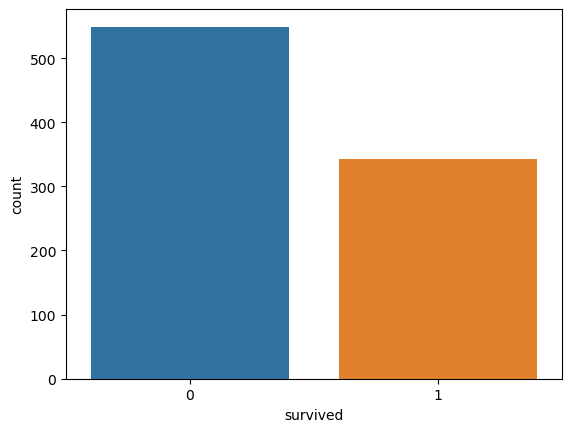

In [4]:
#3a

sns.countplot(data=df, x='survived')
plt.show()

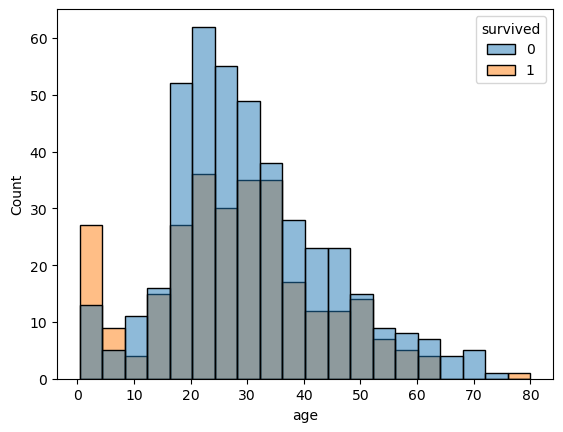

In [6]:
#3b

sns.histplot(data=df, x='age', hue='survived')
plt.show()

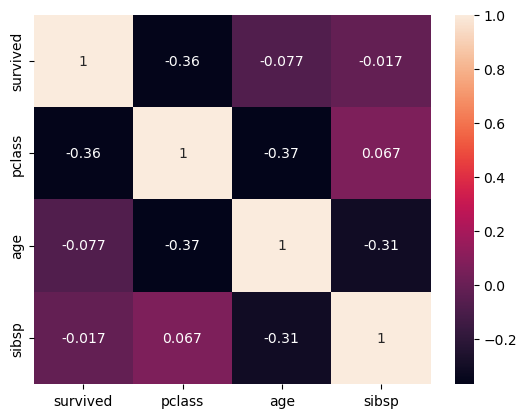

In [8]:
#3c

def is_numeric(val):
  try:
    float(val)
    return True
  except ValueError:
    return False
corr = (
      df.loc[:, ['survived', 'pclass', 'age', 'sibsp']].applymap(lambda v: float(v) if is_numeric(v) else np.nan).dropna()).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
#4

df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#5


print(df.nunique())
for col in ['survived', 'pclass', 'sex']:
    print(df[col].unique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
adult_male       2
deck             7
embark_town      3
dtype: int64
[0 1]
[3 1 2]
['male' 'female']


In [14]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
deck           688
embark_town      2
dtype: int64

In [15]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
mean_age = round(df['age'].mean(), 1)
df['age'].fillna(mean_age, inplace=True)
print(mean_age)

mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)
print(mode_embarked)

mode_embark = df['embark_town'].mode()[0]
df['embark_town'].fillna(mode_embarked, inplace=True)
print(mode_embark)

mode_deck = df['deck'].mode()[0]
df['deck'].fillna(mode_deck, inplace=True)
print(mode_deck)

29.7
S
Southampton
C


In [17]:
#6

def replace_outliers(df, column_name, z_thresh=3):
  ''' replaces outliers from numerical columns of the specified dataset '''
  median = df[column_name].median()
  std = df[column_name].std()
  outliers = (df[column_name] - median).abs() > z_thresh * std
  df[column_name][outliers] = np.nan
  df[column_name].fillna(median, inplace=True)

# numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
numeric_cols = ['age', 'fare']

for val in numeric_cols:
  replace_outliers(df, val)

df.describe(include='all')

C:\Users\priya\AppData\Local\Temp\ipykernel_33488\277812321.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][outliers] = np.nan


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,7,4
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True,C,Southampton
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537,747,644
mean,0.383838,2.308642,NaN,29.364164,0.523008,0.381594,25.921479,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,12.431356,1.102743,0.806057,28.325995,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,29.700000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,29.125000,NaN,NaN,NaN,NaN,NaN


In [19]:
#7

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['sex', 'embarked', 'class', 'embark_town', 'adult_male']
for col in cat_cols:
  df[col] = le.fit_transform(df[col])


df['survived'] = df['survived'].astype('uint8')
df['age'] = df['age'].astype('uint32')
df['pclass'] = df['pclass'].astype('uint8')
df['sibsp'] = df['sibsp'].astype('uint32')
df['parch'] = df['parch'].astype('uint32')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
0,0,3,1,22,1,0,7.2500,2,2,1,C,3
1,1,1,0,38,1,0,71.2833,0,0,0,C,0
2,1,3,0,26,0,0,7.9250,2,2,0,C,3
3,1,1,0,35,1,0,53.1000,2,0,0,C,3
4,0,3,1,35,0,0,8.0500,2,2,1,C,3


In [23]:
#8

X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]
print(X.head())
print(y.head())

   pclass  sex       age  sibsp  parch      fare  embarked  class  adult_male  \
0       3    1 -0.579387      1      0 -0.659534         2      2           1   
1       1    0  0.707378      1      0  1.602320         0      0           0   
2       3    0 -0.257696      0      0 -0.635691         2      2           0   
3       1    0  0.466109      1      0  0.960029         2      0           0   
4       3    1  0.466109      0      0 -0.631276         2      2           1   

  deck  
0    C  
1    C  
2    C  
3    C  
4    C  
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: uint8


In [21]:
#9

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['fare'] = scaler.fit_transform(df[['fare']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town
0,0,3,1,-0.579387,1,0,-0.659534,2,2,1,C,3
1,1,1,0,0.707378,1,0,1.602320,0,0,0,C,0
2,1,3,0,-0.257696,0,0,-0.635691,2,2,0,C,3
3,1,1,0,0.466109,1,0,0.960029,2,0,0,C,3
4,0,3,1,0.466109,0,0,-0.631276,2,2,1,C,3


In [22]:
#10

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(668, 10)
(223, 10)
